<h1>Módulo 2: Implementación de una técnica de aprendizaje máquina sin el uso de un framework.</h1>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive"

/content/gdrive/MyDrive


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Valhalla23.csv')

In [78]:
print(data)

    Celsius     Valks
0   61.4720 -139.7400
1   70.5790 -156.6000
2   -7.3013   73.2690
3   71.3380 -165.4200
4   43.2360  -75.8350
..      ...       ...
95  -7.0094   69.6320
96  36.8820  -71.2400
97  26.9390  -34.2550
98 -18.8100  106.4300
99  13.7120    9.1011

[100 rows x 2 columns]


Costo para el conjunto de entrenamiento: 20.434923609944555
Costo para el conjunto de prueba: 27.806495000016376


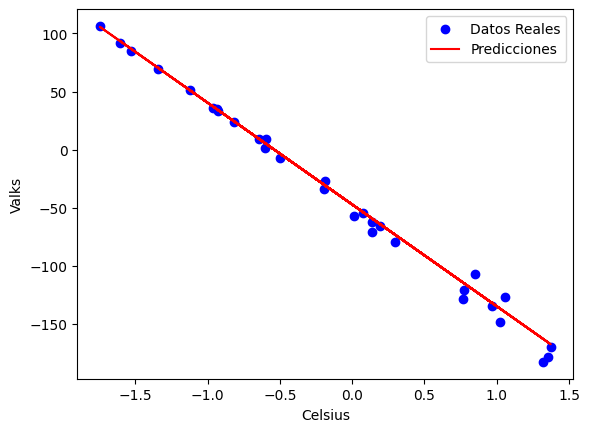

In [79]:
X = data['Celsius'].values
y = data['Valks'].values

# Normalizacion de los datos
X = (X - np.mean(X)) / np.std(X)

# Añadir una columna de unos a X para el término de sesgo
X = np.c_[np.ones(X.shape[0]), X]

# SE dividen los datos en conjuntos de entrenamiento 70% y prueba 30%
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Parametros
theta = np.random.randn(2)
learning_rate = 0.5  # Reducir la tasa de aprendizaje
iterations = 100  # Aumentar el número de iteraciones

# Funcion de costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Gradiente descendente
def gradiente_descendente(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (1/m) * learning_rate * (X.T.dot(errors))
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Entrenamiento del Modelo
theta, cost_history = gradiente_descendente(X_train, y_train, theta, learning_rate, iterations)

# Aqui se calcula el costo para los subconjuntos de entrenamiento y prueba
train_cost = compute_cost(X_train, y_train, theta)
test_cost = compute_cost(X_test, y_test, theta)

print(f'Costo para el conjunto de entrenamiento: {train_cost}')
print(f'Costo para el conjunto de prueba: {test_cost}')

# Predicciones
predictions = X_test.dot(theta)

# Grafica
plt.scatter(X_test[:, 1], y_test, color='blue', label='Datos Reales')
plt.plot(X_test[:, 1], predictions, color='red', label='Predicciones')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()
plt.show()